In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\siri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


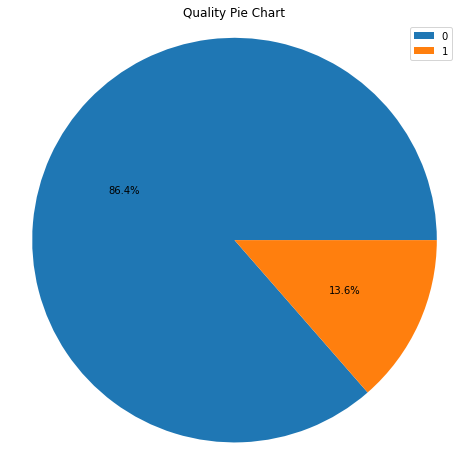

The good quality wines count for  13.6 %.


In [11]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')


good = df[df.grade == 1]

notgood = df[df.grade == 0]

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

df_train_features = df.drop(['quality','grade'], axis =1)
n = 11

x_train, x_test, y_train, y_test = train_test_split(df_train_features, df['grade'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))

In [12]:

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_mat,y_train)
tree_pred = decision_tree.predict(x_test_mat)

rf = RandomForestClassifier()
rf.fit(x_train_mat,y_train)
rf_pred = rf.predict(x_test_mat)

KN = KNeighborsClassifier()
KN.fit(x_train_mat,y_train)
KN_pred = KN.predict(x_test_mat)

svc = SVC()
svc.fit(x_train_mat,y_train)
svc_pred = svc.predict(x_test_mat)


In [13]:
print('Logistic Regression:', accuracy_score(y_test,y_pred)*100,'%')
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVC:',accuracy_score(y_test, svc_pred)*100,'%')

Logistic Regression: 90.625 %
Decision Tree: 87.5 %
Random Forest: 93.125 %
KNeighbors: 87.5 %
SVC: 90.625 %
